In [1]:
!pip install kaggle

In [2]:
!mkdir .kaggle

mkdir: cannot create directory ‘.kaggle’: File exists


In [0]:
import json
token = {'username':'gowravtata','key':'7d1212acbafcffffb7b09f260a0bc5ac'}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

In [0]:
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json

In [5]:
!kaggle config set -n path -v{/content}

- path is now set to: {/content}


In [0]:
!chmod 600 /root/.kaggle/kaggle.json

In [7]:
!kaggle datasets list -s Alien

ref                                        title                                size  lastUpdated          downloadCount  
-----------------------------------------  ----------------------------------  -----  -------------------  -------------  
pmigdal/alien-vs-predator-images           Alien vs. Predator images            14MB  2018-09-27 14:18:46           1176  
jessicali9530/mso-dataset                  Multi-Salient-Object (MSO) Dataset  344MB  2018-06-05 05:23:47            394  
figshare/the-global-avian-invasions-atlas  The Global Avian Invasions Atlas      1GB  2017-04-08 02:50:53            151  
mypandadoes/48bit-alien-faces              48bit alien faces                    10MB  2019-01-05 05:23:34             33  
tentotheminus9/seti-data                   SETI Data                             5GB  2018-09-28 10:18:06            363  
sal001/predict-future-sales-ip-groups      Predict Future Sales IP Groups      124KB  2020-04-30 07:13:58              9  


In [8]:
!kaggle datasets download -d pmigdal/alien-vs-predator-images -p /content

alien-vs-predator-images.zip: Skipping, found more recently modified local copy (use --force to force download)


In [0]:
!unzip \*.zip

Archive:  alien-vs-predator-images.zip
replace alien_vs_predator_thumbnails/data/train/alien/0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [8]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense

Using TensorFlow backend.


In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape = (150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(units=32,activation='relu'),
     tf.keras.layers.Dense(units=1,activation='sigmoid')
])

In [0]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [13]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        validation_split=0.3)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory('data/train/',
                                               target_size=(150, 150),
                                               batch_size=32,
                                               class_mode='binary')
validation_generator = test_datagen.flow_from_directory('data/validation/',
                                                target_size=(150, 150),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False)

Found 694 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [14]:
history = model.fit_generator(train_generator,
                             steps_per_epoch=300,
                             epochs=10,
                             validation_data=validation_generator,
                             validation_steps=200)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
300/300 [==============================] - 74s 247ms/step - loss: 0.4916 - accuracy: 0.7508 - val_loss: 0.5240 - val_accuracy: 0.7355
Epoch 2/10
300/300 [==============================] - 74s 248ms/step - loss: 0.2874 - accuracy: 0.8758 - val_loss: 0.7826 - val_accuracy: 0.7795
Epoch 3/10
300/300 [==============================] - 75s 252ms/step - loss: 0.1534 - accuracy: 0.9400 - val_loss: 0.7888 - val_accuracy: 0.8192
Epoch 4/10
300/300 [==============================] - 75s 249ms/step - loss: 0.0738 - accuracy: 0.9751 - val_loss: 1.3042 - val_accuracy: 0.8296
Epoch 5/10
300/300 [==============================] - 74s 248ms/step - loss: 0.0581 - accuracy: 0.9783 - val_loss: 1.0090 - val_accuracy: 0.8301
Epoch 6/10
300/300 [==============================] - 75s 250ms/step - loss: 0.0405 - accuracy: 0.9870 - val_loss: 1.5403 - val_accuracy: 0.7965
Epoch 7/10
300/300 [==============================] - 

In [15]:
train_generator.class_indices

{'alien': 0, 'predator': 1}

Predicted is Predator


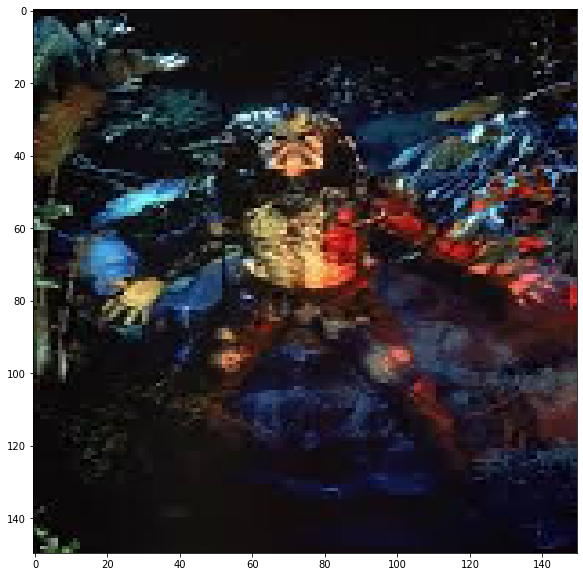

In [16]:
import numpy as np
from keras.preprocessing import image
test_image= image.load_img('data/validation/predator/1.jpg'
                           ,target_size =(150,150))


import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.imshow(test_image)


test_image = image.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
test_image=test_image.reshape(1,150,150,3)
result = model.predict(test_image)

if result[0][0] == 0:
    prediction = 'Alien'
else:
    prediction = 'Predator'

print(f'Predicted is {prediction}')